In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import glob

In [4]:
x = glob.glob('gldas__v21__clip/*.nc')
len(x)

268

In [28]:
import shutil

In [32]:
shutil.make_archive('wajid','zip','wajid')
shutil.make_archive('wasia','zip','wasia')

'/work/albertl_uri_edu/mena/wasia.zip'

In [31]:
shutil.make_archive('umm','zip','umm')

'/work/albertl_uri_edu/mena/umm.zip'

In [33]:
shutil.make_archive('v20_monthly_wajid','zip','v20_monthly_wajid')
shutil.make_archive('v20_monthly_wasia','zip','v20_monthly_wasia')
shutil.make_archive('v20_monthly_umm','zip','v20_monthly_umm')

'/work/albertl_uri_edu/mena/v20_monthly_umm.zip'

In [18]:
import xarray as xr
import glob
from shapely.geometry import mapping
import geopandas as geo

def clip(rast,shp,name,yearmonthdotnc):
    basin = geo.read_file(shp)
    # rast = xr.open_dataset(raster)
    rast.rio.write_crs(4326,inplace=True)
    rast.rio.set_spatial_dims(x_dim="lon",y_dim="lat")
    r_clip = rast.rio.clip(basin.geometry.apply(mapping),basin.crs) ### !!! ###
#     plt.imshow(np.where(r_clip[0]<0,np.nan,r_clip[0]))
    r_clip.to_netcdf(f'v21_monthly_{name}/{name}_{yearmonthdotnc}')
    return r_clip

for x in glob.glob('gldas__v21__clip/*.nc'):
    # print(x[-5:-3])
    # break
    raster = xr.open_dataset(x)
    print(raster)
    break
    # clip(raster,'umm/umm.shp','umm',f"{x[-9:-5]}_{x[-5:-3]}.nc")
    # clip(raster,'wasia/wasia.shp','wasia',f"{x[-9:-5]}_{x[-5:-3]}.nc")
    # clip(raster,'wajid/wajid.shp','wajid',f"{x[-9:-5]}_{x[-5:-3]}.nc")

<xarray.Dataset>
Dimensions:       (time: 1, bnds: 2, lon: 140, lat: 120)
Coordinates:
  * time          (time) datetime64[ns] 2000-01-01
  * lon           (lon) float32 30.12 30.38 30.62 30.88 ... 64.38 64.62 64.88
  * lat           (lat) float32 10.12 10.38 10.62 10.88 ... 39.38 39.62 39.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds     (time, bnds) datetime64[ns] ...
    Rainf_tavg    (time, lat, lon) float32 ...
    Rainf_f_tavg  (time, lat, lon) float32 ...
Attributes: (12/20)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    Conventions:            CF-1.6
    history:                created on date: 2019-09-17T14:58:21.836
    source:                 Noah_v3.6 forced with GDAS-AGRMET-GPCPv13rA1
    institution:            NASA GSFC
    missing_value:          -9999.0
    ...                     ...
    SOUTH_WEST_CORNER_LAT:  -59.875
    SOUTH_WEST_CORNER_LON:  -179.875
    DX:                     0.25
    DY:            

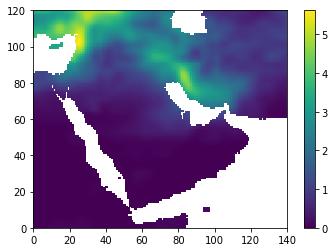

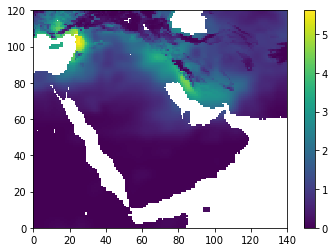

In [26]:
import matplotlib.pyplot as plt
plt.pcolormesh(raster.Rainf_f_tavg[0]*24*60*60)
plt.gca().set_aspect('equal')
plt.colorbar()

plt.figure()
plt.pcolormesh(raster.Rainf_tavg[0]*24*60*60)
plt.gca().set_aspect('equal')
plt.colorbar()

In [ ]:
###download script used

In [3]:
import numpy as np
import requests
import glob
import re

f = open("subset_GLDAS_NOAH025_M_2.1_20220712_154704.txt", "r")

list_of_files_to_download = [i.strip() for i in f]
list_of_files_to_download = list_of_files_to_download[1:]
list_of_files_to_download = np.asarray(list_of_files_to_download)
# list_of_files_to_download[0]

class SessionWithHeaderRedirection(requests.Session):
    AUTH_HOST = 'urs.earthdata.nasa.gov'

    def __init__(self, username, password):
        super().__init__()
        self.auth = (username, password)

    # Overrides from the library to keep headers when redirected to or from the NASA auth host.
    def rebuild_auth(self, prepared_request, response):
        headers = prepared_request.headers
        url = prepared_request.url
        if 'Authorization' in headers:
            original_parsed = requests.utils.urlparse(response.request.url)
            redirect_parsed = requests.utils.urlparse(url)
            if (original_parsed.hostname != redirect_parsed.hostname) and \
               redirect_parsed.hostname != self.AUTH_HOST and \
               original_parsed.hostname != self.AUTH_HOST:
                del headers['Authorization']
        return


# create session with the user credentials that will be used to authenticate access to the data

username="albertlarson" ###YOU THE READER OF FLUXTOFLOW NEED A NASA EARTHDATA ACCOUNT!!!
password="Andes27Hearts34!"
session = SessionWithHeaderRedirection(username, password)



# checks file folder to see if your destination folder for all these NLDAS files has any files in it, to
# prevent your code from downloading the same files multiple times.


destination_files = 'gldas__v21__clip/*.nc'

files_in_destination = []
for x in glob.glob(destination_files):
    numbers = list(set(re.findall('[0-9][0-9][0-9][0-9][0-9][0-9]', x)))[0]
    files_in_destination.append(numbers)
print(f"length of destination folder array: {len(files_in_destination)}")
# import sys; sys.exit()

        
not_dled = []
dled = []


# lis is the text file containing links of all the files to be downloaded.
for x in list_of_files_to_download:
    numbers = list(set(re.findall('[0-9][0-9][0-9][0-9][0-9][0-9]', x)))[0]
    if str(numbers) not in files_in_destination:
        not_dled.append(x)
    if str(numbers) in files_in_destination:
        dled.append(x)

# if len(not_dled) != 0:
#     while True:
#         print(not_dled[0])
#         quit=input('does this formatting looks good for links to download? (y/n) \t')
#         if quit not in ['y','n']:
#             print('try again:\n')
#         elif quit == 'n':
#             import sys
#             sys.exit()
#         else:
#             break
# else:
#     print('none left to download')
    
        
print(f"length of not downloaded array: {len(not_dled)}")
print(f"length of downloaded array: {len(dled)}")



# this while loop keeps attempting to download all of the files in your list of NLDAS files until all 
# of them have been downloaded. it also presents an http message number associated with your request 
# https://developer.mozilla.org/en-US/docs/Web/HTTP/Messages
while True:
    for idx,i in enumerate(not_dled):
        numbers = list(set(re.findall('[0-9][0-9][0-9][0-9][0-9][0-9]', i)))[0]
        try:

            # submit the request using the session
            response = session.get(i, stream=True)
            print(response.status_code)
            # raise an exception in case of http errors
            response.raise_for_status()
            # save the file
            with open(f'gldas__v21__clip/ksa_{numbers}.nc', 'wb') as fd:
                for data in response:
                    fd.write(data)
            fd.close()
        except requests.exceptions.HTTPError as e:
            # handle any errors here
            print('error',e)
    
    files_in_destination = []
    for x in glob.glob(destination_files):
        numbers = list(set(re.findall('[0-9][0-9][0-9][0-9][0-9][0-9]', x)))[0]
        files_in_destination.append(numbers)
    # print(y)
    not_dled = []
    dled = []
    for x in list_of_files_to_download:
        numbers = list(set(re.findall('[0-9][0-9][0-9][0-9][0-9][0-9]', x)))[0]
        if str(numbers) not in files_in_destination:
            not_dled.append(x)
        if str(numbers) in files_in_destination:
            dled.append(x)
            
    print(f"length of downloaded items array after run:\t{len(dled)}")
    print(f"length of not yet downloaded items array after run: \t{len(not_dled)}")
    # print(f'dled: \t \n \t')
    # for x in dled:
    #     print('\t',x,'\t')
    # print(f'not dled: \t \n \t')
    # for x in not_dled:
    #     print('\t',x,'\t')

            
    if len(not_dled) == 0:
        import sys
        sys.exit('no more left to download')

length of destination folder array: 0
length of not downloaded array: 268
length of downloaded array: 0
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


SystemExit: no more left to download

/work/albertl_uri_edu/.conda/envs/sm/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
